In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [30]:
# with open("/p/work/hpan/control_transition/Clifford"+"/Clifford_En(1,501)_EnC(1,51)_pm(0.500,0.500,1)_alpha0.5_L16_T.pickle", "rb") as f:
with open("/p/work/hpan/control_transition/Clifford"+"/Clifford_En(1,501)_EnC(1,501)_pm(0.000,0.000,1)_alpha0.5_L16_T.pickle", "rb") as f:
    data = pickle.load(f)

(0.0, 100.0)

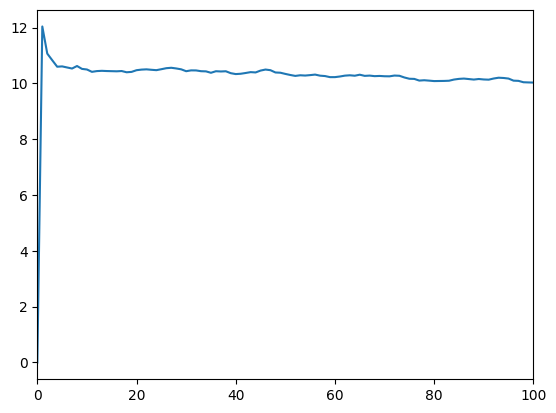

In [27]:
plt.plot(data['coherence'].mean(axis=(1,2))[0])
plt.xlim(0,100)

In [31]:
np.log2((2**data['coherence']-1).mean(axis=(1,2))[0,:100])

/p/work/hpan/ipykernel_3153092/382022672.py:1: RuntimeWarning: divide by zero encountered in log2
  np.log2((2**data['coherence']-1).mean(axis=(1,2))[0,:100])


array([       -inf, 14.62146721, 15.30359897, 15.46568144, 15.38235681,
       15.39640008, 15.38346319, 15.40377978, 15.40268887, 15.38014148,
       15.41707691, 15.39448065, 15.41518481, 15.45480178, 15.42408307,
       15.41572566, 15.40895037, 15.44939707, 15.43159032, 15.44834013,
       15.40867869, 15.41599601, 15.38925785, 15.41112193, 15.38567343,
       15.4286457 , 15.39008376, 15.42300741, 15.46568144, 15.44913291,
       15.41220648, 15.40023131, 15.37375341, 15.37486642, 15.40595913,
       15.38401607, 15.45572252, 15.44357428, 15.46359053, 15.38512118,
       15.4488687 , 15.41707691, 15.41734701, 15.45756223, 15.42569506,
       15.42877968, 15.43532934, 15.39941118, 15.40405238, 15.41626631,
       15.41680676, 15.38484499, 15.43985659, 15.44516464, 15.40241602,
       15.37458825, 15.3985906 , 15.38898244, 15.44569438, 15.41680676,
       15.41193542, 15.39776954, 15.41545526, 15.3342473 , 15.43078783,
       15.39516645, 15.43052024, 15.4286457 , 15.39968461, 15.38

In [19]:
np.log(2/3 * (2**16-1))

np.float64(10.684874521945481)

In [8]:
data_ = {}
L_list = [16, 32, 64,128]
for L in L_list:
    # with open(f"Clifford_En(1,2)_EnC(1,200)_pm(0.500,0.900,11)_alpha3.5_L{L}_T.pickle", "rb") as f:
    # with open(f"Clifford_En(1,2)_EnC(1,1000)_pm(0.000,0.900,11)_alpha3.5_L{L}_T.pickle", "rb") as f:
    with open(f"Clifford_En(1,2)_EnC(1,1000)_pm(0.000,0.900,11)_alpha0.5_L{L}_T.pickle", "rb") as f:
        data_[L] = pickle.load(f)

In [23]:
with open("Clifford_En(1,2)_EnC(1,50)_pm(0.500,0.900,11)_alpha3.5_L64_T.pickle", "rb") as f:
    data2 = pickle.load(f)

In [5]:
data['Mz'].shape

(11, 1, 49, 843)

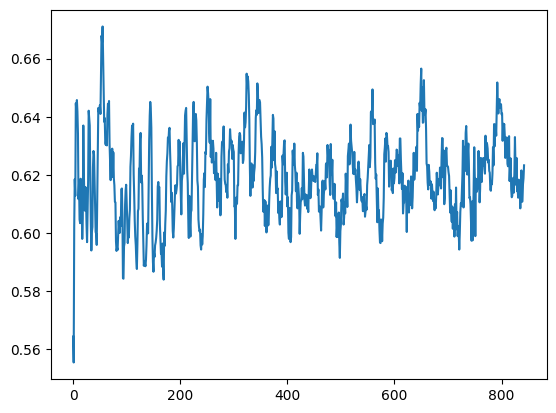

In [27]:
plt.plot(data['Mz'][0,0].mean(axis=0))

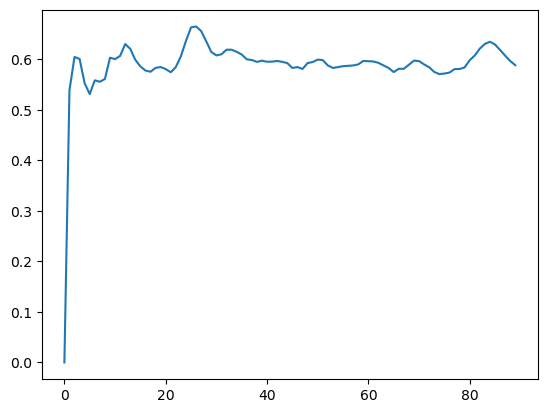

In [46]:
plt.plot(data_[16]['OP'][5,0].mean(axis=0))

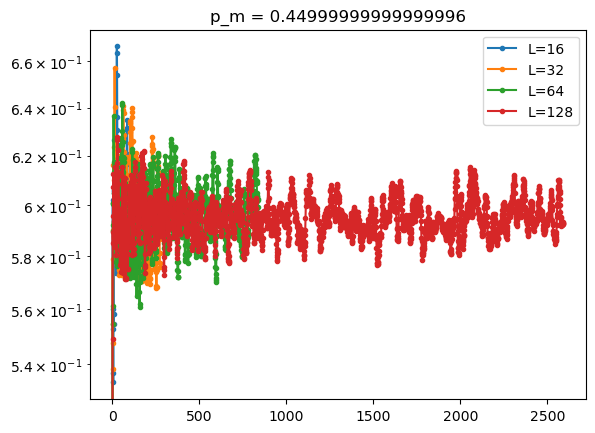

In [52]:
fig, ax = plt.subplots()
idx=5
for L in L_list:
    y = data_[L]['OP'][idx,0].mean(axis=0)
    ax.plot(y, '.-', label=f'L={L}')
    # ax.axhline( 2**L * np.pi / 5, color='k', linestyle='--' )
ax.set_title(f'p_m = {p_list[idx]}')
ax.set_yscale('log')
ax.legend()


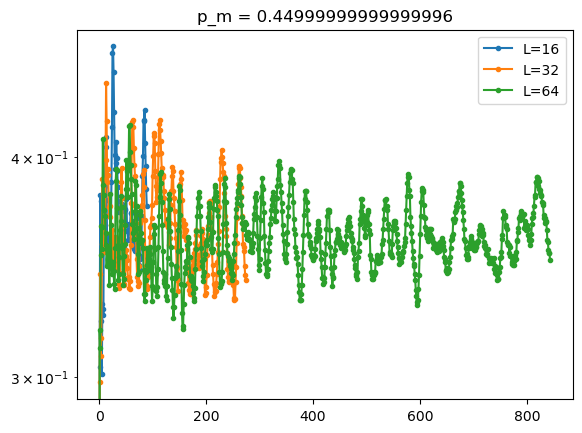

In [56]:
fig, ax = plt.subplots()
idx=5
for L in L_list[:3]:
    y = data_[L]['OP2'][idx,0].mean(axis=0)
    ax.plot(y, '.-', label=f'L={L}')
    # ax.axhline( 2**L * np.pi / 5, color='k', linestyle='--' )
ax.set_title(f'p_m = {p_list[idx]}')
ax.set_yscale('log')
ax.legend()


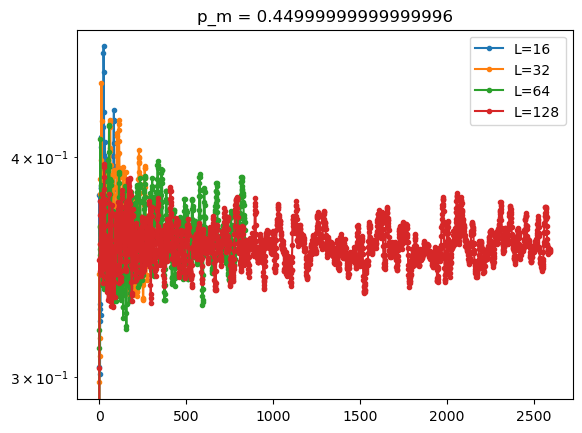

In [57]:
fig, ax = plt.subplots()
idx=5
for L in L_list[:4]:
    y = data_[L]['OP2'][idx,0].mean(axis=0)
    ax.plot(y, '.-', label=f'L={L}')
    # ax.axhline( 2**L * np.pi / 5, color='k', linestyle='--' )
ax.set_title(f'p_m = {p_list[idx]}')
ax.set_yscale('log')
ax.legend()


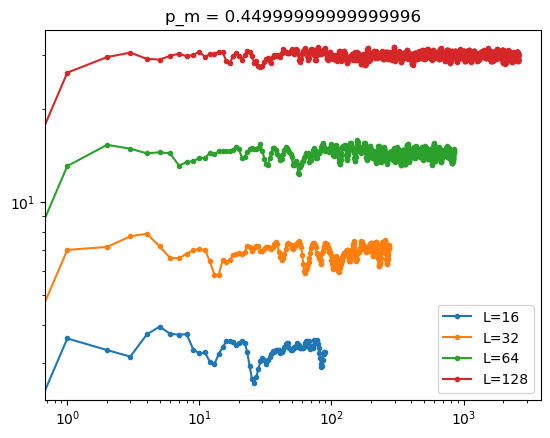

In [60]:
fig, ax = plt.subplots()
idx=5
for L in L_list[:4]:
    y = data_[L]['EE'][idx,0].mean(axis=0)
    ax.plot(y, '.-', label=f'L={L}')
    # ax.axhline( 2**L * np.pi / 5, color='k', linestyle='--' )
ax.set_title(f'p_m = {p_list[idx]}')
ax.set_yscale('log')
ax.legend()
ax.set_xscale('log')


In [26]:
data_[L]['coherence'].shape

(11, 1, 999, 2593)

In [30]:
p_list = np.linspace(0.0,0.9,11)

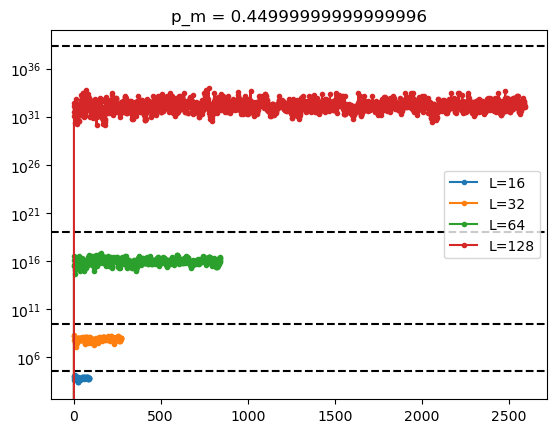

In [36]:
fig, ax = plt.subplots()
idx=5
for L in L_list:
    y = data_[L]['coherence'][idx,0].mean(axis=0)
    ax.plot(y, '.-', label=f'L={L}')
    ax.axhline( 2**L * np.pi / 5, color='k', linestyle='--' )
ax.set_title(f'p_m = {p_list[idx]}')
ax.set_yscale('log')
ax.legend()


In [37]:
data_[L]['coherence'][idx,0].shape

(999, 2593)

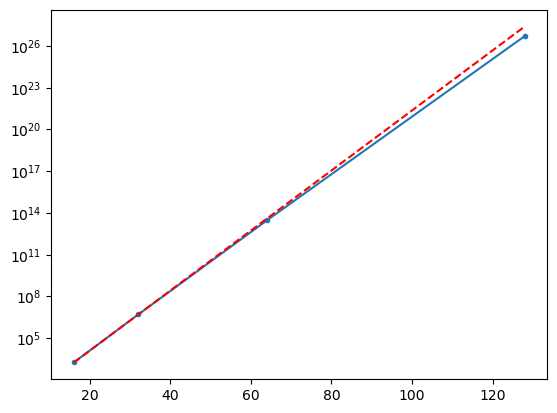

In [46]:
fig, ax = plt.subplots()
idx=7
x = L_list
y = [data_[L]['coherence'][idx,0].mean(axis=0)[int(L**1.62//2):].mean() for L in L_list]
ax.plot(x, y,'.-')

idx_min=0
idx_max=2
x_fit = x[idx_min:idx_max]
y_fit = y[idx_min:idx_max]
log_y = np.log10(y_fit)
slope, intercept = np.polyfit(x_fit, log_y, 1)
def fitted_line(L):
        return 10**(intercept + slope * L)

    # Plot the original data and the fitted line
ax.plot(x, fitted_line(np.array(x)), 'r--')


# for L in L_list:
#     y = data_[L]['coherence'][idx,0].mean(axis=0)
#     ax.plot(y, '.-', label=f'L={L}')
#     ax.axhline( 2**L * np.pi / 5, color='k', linestyle='--' )
# ax.set_title(f'p_m = {p_list[idx]}')
ax.set_yscale('log')
# ax.legend()

In [12]:
x.shape

(1,)

In [ ]:
plt.plot()

In [9]:
x=np.linspace(0.5,0.9,11)
for L in L_list:
    y=data_[L]['Mz'].mean(axis=-2)[...,-1]
    plt.plot(x,y,'.-',label=f'L={L}')
plt.legend()

KeyError: 'Mz'

In [68]:
y.shape

(11, 1)

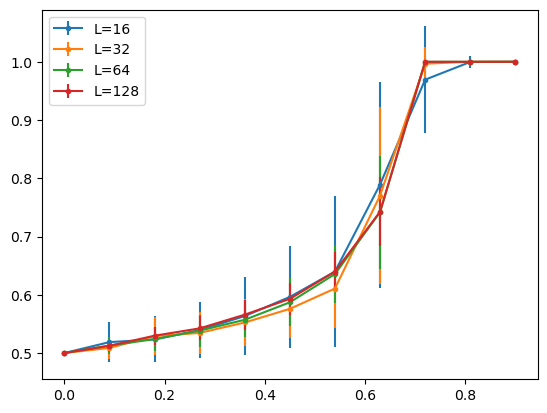

In [10]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['OP'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['OP'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()

(0.0, 8.0)

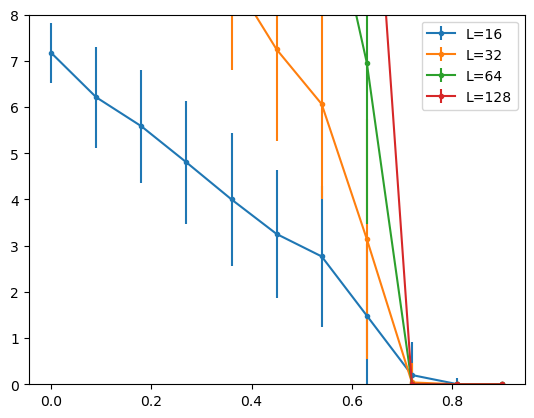

In [11]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['EE'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['EE'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()
plt.ylim(0,8)

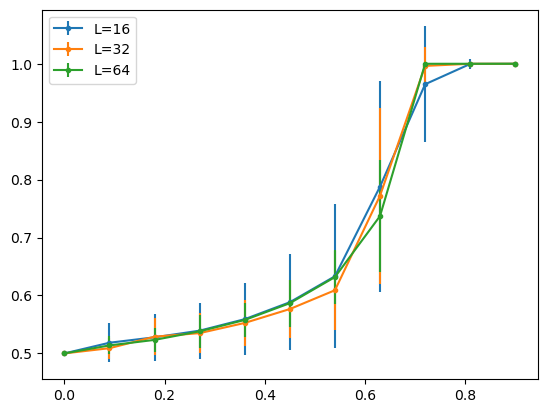

In [32]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['OP'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['OP'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()

(0.4, 1.0)

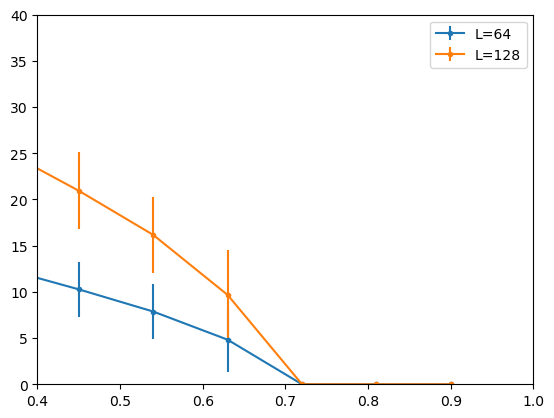

In [51]:
x=np.linspace(0.0,0.9,11)
for L in L_list[2:]:
    y=data_[L]['EE'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['EE'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y*np.log(2), yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()
plt.ylim(0,40)
plt.xlim(0.4,1)

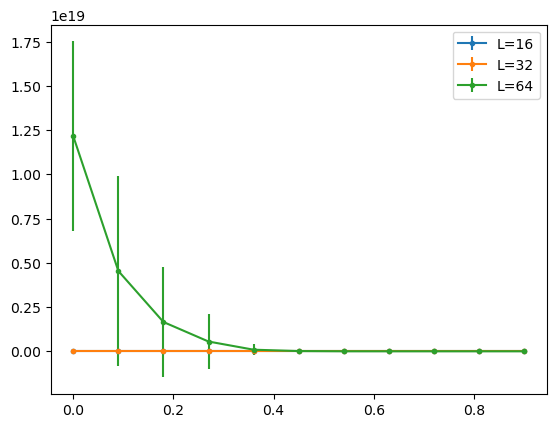

In [20]:
x=np.linspace(0.0,0.9,11)
for L in L_list[:-1]:
    y=data_[L]['coherence'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['coherence'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()
# plt.ylim(0,40)
# plt.xlim(0.4,1)

In [18]:
np.isnan(data_[128]['coherence']).any()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['EE'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['EE'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()
plt.ylim(0,40)
plt.xlim(0.4,1)

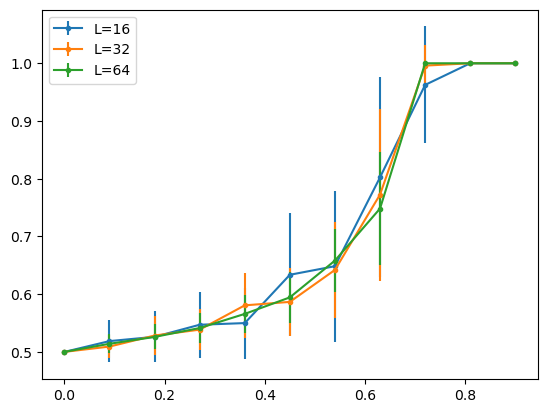

In [3]:
x=np.linspace(0.0,0.9,11)
for L in L_list:
    y=data_[L]['OP'].mean(axis=-2)[...,-1].flatten()
    yerr= data_[L]['OP'].std(axis=-2)[...,-1].flatten()
    plt.errorbar(x, y, yerr=yerr, fmt='.-', label=f'L={L}')
plt.legend()

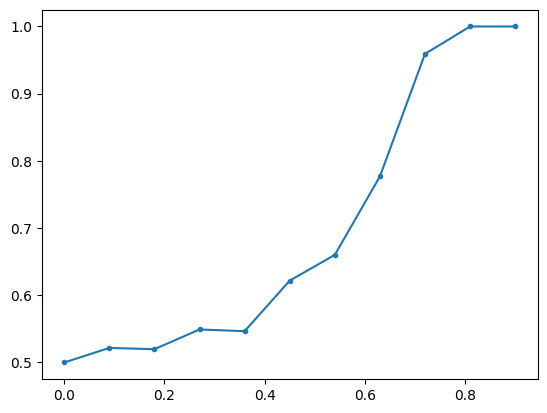

In [60]:
x=np.linspace(0.0,0.9,11)
y=data['OP'].mean(axis=-2)[...,-1]
plt.plot(x,y,'.-')

# Profiler

In [1]:
%load_ext line_profiler

In [2]:
from rqc_sv.clifford import Clifford
import stim

In [3]:
L=64
cliff = Clifford(L=L, seed=0, seed_C=0, store_op=False, alpha=0.5)
# for _ in range(1):
#     cliff.random_circuit(p_m=0.)

In [4]:
cliff.OP12()

(np.float64(0.0), np.float64(0.0))

In [5]:
cliff.OP(), cliff.OP2_sparse()

(np.float64(0.0), np.float64(0.0))

In [44]:
cliff.sim.canonical_stabilizers()

[stim.PauliString("-Y___"),
 stim.PauliString("+_X__"),
 stim.PauliString("-__X_"),
 stim.PauliString("-___X")]

In [45]:
cliff.sim.current_inverse_tableau().inverse()

stim.Tableau.from_conjugated_generators(
    xs=[
        stim.PauliString("-XXYX"),
        stim.PauliString("+XZ_Y"),
        stim.PauliString("+__ZY"),
        stim.PauliString("+_XXZ"),
    ],
    zs=[
        stim.PauliString("-YX__"),
        stim.PauliString("+_X__"),
        stim.PauliString("+YXX_"),
        stim.PauliString("-Y_XX"),
    ],
)

In [33]:
def run_sparse(galois=False):
    L=128
    cliff = Clifford(L=L, seed=0, seed_C=0, store_op=False, alpha=0.5)
    tf = int(L**1.6)
    OP_list = []
    OP2_list = []
    coherence_list = []
    EE_list = []
    for i in range(tf):
        cliff.random_circuit(p_m=0.6)
        OP_list.append(cliff.OP())
        OP2_list.append(cliff.OP2_sparse())
        coherence_list.append(cliff.quantum_L1_coherence(galois=galois))
        EE_list.append(cliff.half_system_entanglement_entropy(galois=galois))
    return OP_list, OP2_list

In [4]:
def run_sparse_new(galois=False):
    L=128
    cliff = Clifford(L=L, seed=0, seed_C=0, store_op=False, alpha=0.5)
    tf = int(L**1.6)
    OP_list = []
    OP2_list = []
    coherence_list = []
    EE_list = []
    for i in range(tf):
        cliff.random_circuit(p_m=0.6)
        OP,OP2= cliff.OP12()
        OP_list.append(OP)
        OP2_list.append(OP2)
        coherence_list.append(cliff.quantum_L1_coherence(galois=galois))
        EE_list.append(cliff.half_system_entanglement_entropy(galois=galois))
    return OP_list, OP2_list

In [34]:
%lprun -f run_sparse OP_list, OP2_list = run_sparse(galois=False)

Timer unit: 1e-09 s

Total time: 37.1319 s
File: /tmp/ipykernel_1338961/523649510.py
Function: run_sparse at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sparse(galois=False):
     2         1       1574.0   1574.0      0.0      L=128
     3         1   76649217.0 7.66e+07      0.2      cliff = Clifford(L=L, seed=0, seed_C=0, store_op=False, alpha=0.5)
     4         1       5591.0   5591.0      0.0      tf = int(L**1.6)
     5         1        992.0    992.0      0.0      OP_list = []
     6         1        732.0    732.0      0.0      OP2_list = []
     7         1        631.0    631.0      0.0      coherence_list = []
     8         1        611.0    611.0      0.0      EE_list = []
     9      2353    1216281.0    516.9      0.0      for i in range(tf):
    10      2352      1.3e+10 5.53e+06     35.0          cliff.random_circuit(p_m=0.6)
    11      2352  138661520.0  58954.7      0.4          OP_

In [73]:
%lprun -f Clifford.random_circuit OP_list_new, OP2_list_new = run_sparse_new(galois=False)

Timer unit: 1e-09 s

Total time: 13.3985 s
File: /home/hnpan/control_transition/rqc_sv/clifford.py
Function: Clifford.random_circuit at line 289

Line #      Hits         Time  Per Hit   % Time  Line Contents
   289                                               def random_circuit(self, p_m):
   290                                                   """Execute one timestep with 5 layers."""
   291                                                   # Layer 1: Odd Measurements
   292    152880   50658731.0    331.4      0.4          for i, j in self.odd_pairs:
   293    150528  104192086.0    692.2      0.8              if self.rng_C.random() < p_m:
   294     90291 4309276304.0  47726.5     32.2                  self.measure_pair(i, j)
   295                                           
   296                                                   # Layer 2: Odd Unitaries
   297    152880   50270939.0    328.8      0.4          for i, j in self.odd_pairs:
   298    150528 1053475704.0   6998.5   

In [5]:
%lprun -f Clifford.random_circuit OP_list_new, OP2_list_new = run_sparse_new(galois=False)

Timer unit: 1e-09 s

Total time: 13.1695 s
File: /home/hnpan/control_transition/rqc_sv/clifford.py
Function: Clifford.random_circuit at line 289

Line #      Hits         Time  Per Hit   % Time  Line Contents
   289                                               def random_circuit(self, p_m):
   290                                                   """Execute one timestep with 5 layers."""
   291                                                   # Pre-generate random numbers for measurement decisions
   292      2352   12923392.0   5494.6      0.1          odd_mask = self.rng_C.random(len(self.odd_pairs)) < p_m
   293      2352    5733432.0   2437.7      0.0          even_mask = self.rng_C.random(len(self.even_pairs)) < p_m
   294                                           
   295                                                   # Layer 1: Odd Measurements
   296    152880   51144071.0    334.5      0.4          for idx, (i, j) in enumerate(self.odd_pairs):
   297    150528   51041427.0

In [ ]:
%lprun -f Clifford.random_circuit OP_list_new, OP2_list_new = run_sparse_new(galois=False)

In [36]:
import numpy as np

In [37]:
np.allclose(OP2_list_new, OP2_list)

True

In [38]:
np.allclose(OP_list_new, OP_list)

True

In [13]:
%lprun -f run_sparse run_sparse(galois=True)

Timer unit: 1e-09 s

Total time: 18.9339 s
File: /tmp/ipykernel_1268123/1719384543.py
Function: run_sparse at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sparse(galois=False):
     2         1       1944.0   1944.0      0.0      tf = int(L**1.6)
     3         1        371.0    371.0      0.0      OP_list = []
     4         1        331.0    331.0      0.0      OP2_list = []
     5         1        281.0    281.0      0.0      coherence_list = []
     6         1        271.0    271.0      0.0      EE_list = []
     7       777     479622.0    617.3      0.0      for i in range(tf):
     8       776 1314782489.0 1.69e+06      6.9          cliff.random_circuit(p_m=0.6)
     9       776   34963662.0  45056.3      0.2          OP_list.append(cliff.OP())
    10       776  993441520.0 1.28e+06      5.2          OP2_list.append(cliff.OP2_sparse())
    11       776 7691798072.0 9.91e+06     40.6          cohe

In [20]:
%lprun -f run_sparse2 run_sparse2()

Timer unit: 1e-09 s

Total time: 0.519836 s
File: /tmp/ipykernel_1265607/1420865567.py
Function: run_sparse2 at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def run_sparse2():
     2         1       2585.0   2585.0      0.0      tf = int(L**1.6)
     3         1        340.0    340.0      0.0      OP_list = []
     4         1        240.0    240.0      0.0      OP2_list = []
     5         1        230.0    230.0      0.0      coherence_list = []
     6                                               # EE_list = []
     7       257      99758.0    388.2      0.0      for i in range(tf):
     8       256  239375485.0 935060.5     46.0          cliff.random_circuit(p_m=0.1)
     9       256    9787943.0  38234.2      1.9          OP_list.append(cliff.OP())
    10       256  241011388.0 941450.7     46.4          OP2_list.append(cliff.OP2_sparse())
    11       256   29557963.0 115460.8      5.7          coherence_l

In [9]:
GF2 = galois.GF(2)

In [10]:
GF2(np.array([[1,0,1],[0,1,1]]))

GF([[1, 0, 1],
    [0, 1, 1]], order=2)

In [14]:
np.triu_indices(4,k=1)

(array([0, 0, 0, 1, 1, 2]), array([1, 2, 3, 2, 3, 3]))

In [1]:
from rqc_sv.clifford import Clifford


In [2]:
cliff = Clifford(L=64, seed=0, seed_C=0)


In [3]:
for _ in range(100):
    cliff.random_circuit(p_m=0.3)

In [4]:
assert cliff.quantum_L1_coherence() == cliff.quantum_L1_coherence_fast()


In [8]:
cliff.quantum_L1_coherence()

53

In [5]:
cliff.quantum_L1_coherence_fast()

53

In [6]:

%timeit cliff.quantum_L1_coherence() 

4.88 ms ± 55.5 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
%timeit cliff.quantum_L1_coherence_fast() 

266 μs ± 994 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [7]:
%lprun -f cliff.OP2 run()

Timer unit: 1e-09 s

Total time: 2.22545 s
File: /home/hnpan/control_transition/rqc_sv/clifford.py
Function: Clifford.OP2 at line 135

Line #      Hits         Time  Per Hit   % Time  Line Contents
   135                                               def OP2(self):
   136                                                   """<OP^2> = (1/4L^2) [L^2 + 2L*sum_i<Z_i> + sum_{i,j}<Z_i Z_j>]. Uses pre-cached PauliStrings."""
   137       776   12868433.0  16583.0      0.6          z_exp = np.array([self.sim.peek_z(i) for i in range(self.L)])
   138       776    7241896.0   9332.3      0.3          sum_z = np.sum(z_exp)
   139                                           
   140                                                   # sum_{i,j} <Z_i Z_j> (includes diagonal Z_i^2 = 1)
   141       776     365203.0    470.6      0.0          zz_total = float(self.L)  # Diagonal contribution
   142   1565192  472301044.0    301.8     21.2          for (i, j), pauli in self._zz_paulis.items():
   143   156

In [5]:
%lprun -f cliff.sim.do_tableau run()

/home/hnpan/.pyenv/versions/miniforge3-25.3.1-0/lib/python3.12/site-packages/line_profiler/ipython_extension.py:97: UserWarning: Could not extract a code object for the object <bound method PyCapsule.do_tableau of <stim._stim_sse2.TableauSimulator object at 0x71ef3c3bc870>>
  profile = LineProfiler(*funcs)


Timer unit: 1e-09 s

In [ ]:
%lprun -f cliff.sim.do_tableau run()

In [10]:
class TableauTimer:
    def __init__(self):
        self.total_time = 0
        self.call_count = 0
        self.original = stim.TableauSimulator.do_tableau
        
        # Create wrapper that preserves method signature
        def wrapper(sim_self, *args, **kwargs):
            start = time.perf_counter()
            result = self.original(sim_self, *args, **kwargs)
            self.total_time += time.perf_counter() - start
            self.call_count += 1
            return result
        
        self.wrapper = wrapper
    
    def report(self):
        print(f"do_tableau: {self.call_count} calls, {self.total_time:.6f}s total, "
              f"{self.total_time/self.call_count*1e6:.2f}μs avg")

In [11]:
timer = TableauTimer()
stim.TableauSimulator.do_tableau = timer.wrapper

%lprun -f cliff.sim.do_tableau run()
timer.report()

do_tableau: 96686 calls, 0.880779s total, 9.11μs avg


Timer unit: 1e-09 s

Total time: 0.951885 s
File: /tmp/ipykernel_1235287/2870693882.py
Function: TableauTimer.__init__.<locals>.wrapper at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                                   def wrapper(sim_self, *args, **kwargs):
     9     96686   34029861.0    352.0      3.6              start = time.perf_counter()
    10     96686  815351287.0   8433.0     85.7              result = self.original(sim_self, *args, **kwargs)
    11     96686   36608637.0    378.6      3.8              self.total_time += time.perf_counter() - start
    12     96686   28316004.0    292.9      3.0              self.call_count += 1
    13     96686   37578963.0    388.7      3.9              return result

In [7]:
%lprun -f cliff.random_circuit run()

Timer unit: 1e-09 s

Total time: 1.31562 s
File: /home/hnpan/control_transition/rqc_sv/clifford.py
Function: Clifford.random_circuit at line 100

Line #      Hits         Time  Per Hit   % Time  Line Contents
   100                                               def random_circuit(self, p_m):
   101                                                   """Execute one timestep with 5 layers."""
   102                                                   # Layer 1: Odd Measurements
   103     25608    8045262.0    314.2      0.6          for i, j in self.odd_pairs:
   104     24832   15455412.0    622.4      1.2              if self.rng_C.random() < p_m:
   105      2512   50005839.0  19906.8      3.8                  self.measure_pair(i, j)
   106                                           
   107                                                   # Layer 2: Odd Unitaries
   108     25608    8516373.0    332.6      0.6          for i, j in self.odd_pairs:
   109     24832  260017151.0  10471.1   

In [22]:
x_sec, z_sec = cliff.get_tableau()

In [24]:
import galois

In [25]:
GF2 = galois.GF(2)


In [29]:
np.linalg.matrix_rank(GF2((x_sec).astype(int)))

3

In [30]:
np.linalg.matrix_rank(GF2((z_sec).astype(int)))

16

In [ ]:
k